In [1]:
import pympi

In [2]:
import os

In [3]:
from collections import defaultdict, Counter

In [4]:
from tqdm.auto import tqdm

In [5]:
eaf_files = [file for file in os.listdir('./Разметки eaf') if file.endswith('eaf')]

In [6]:
clfs = defaultdict(list)
for eaf in tqdm(eaf_files):
    eafob = pympi.Elan.Eaf('./Разметки eaf/' + eaf)
    tiers = [tier for tier in eafob.get_tier_names() if 'глосс' in tier]
    for tier in tiers:
        for sign in eafob.get_annotation_data_for_tier(tier):
            sign_desc = sign[2].lower().strip('№%?').strip()
            if 'clf' in sign_desc:
                clfs[eaf].append((sign[0], sign[1], sign_desc))

  0%|          | 0/135 [00:00<?, ?it/s]

In [7]:
clfs

defaultdict(list,
            {'МБ_ЕСЯ.eaf': [(31165, 31915, 'clf:группа:двигаться'),
              (71190, 72033, 'clf:человек:двигаться'),
              (98884, 99571, 'clf:человек:перемещаться.туда-обратно'),
              (103899, 104446, 'clf:человек:перемещаться.туда-обратно'),
              (147359, 147692, 'clf:группа'),
              (98884, 99571, 'clf:человек:перемещаться.туда-обратно'),
              (103899, 104446, 'clf:человек:перемещаться.туда-обратно'),
              (147359, 147692, 'clf:группа')],
             'Кеша1_ВПР.eaf': [(22893, 23382, 'clf:дверь.открыть'),
              (22893, 23382, 'clf:дверь.открыть')],
             'Соловейчик_3_ААС.eaf': [(74015, 74465, 'clf:взять.привести'),
              (86920, 87510, 'clf:взять.привести'),
              (179230, 179490, 'clf:человек'),
              (182055, 182365, 'clf:человек'),
              (188100, 188410, 'clf:человек'),
              (191750, 191850, 'clf:человек'),
              (203300, 203630, 'clf:челове

In [8]:
import csv

# with open('clfs_timecodes.csv', 'w') as f:
#     writer = csv.writer(f)
    
#     writer.writerow(['file_name', 'classifier', 'timecodes'])
#     for file, clf in clfs.items():
#         for c in clf:
#             writer.writerow([file, c[-1], c[:-1]])

In [9]:
clfs_all = Counter()
total = 0
for file, clf in clfs.items():
    for c in clf:
        clfs_all[c[-1]] += 1
        total += 1

In [10]:
clfs_all

Counter({'clf:группа:двигаться': 1,
         'clf:человек:двигаться': 3,
         'clf:человек:перемещаться.туда-обратно': 4,
         'clf:группа': 12,
         'clf:дверь.открыть': 4,
         'clf:взять.привести': 8,
         'clf:человек': 37,
         'clf:много.людей.приходит': 2,
         'clf:пить.воду.из.стакана': 2,
         'clf:стрелка.весов': 2,
         'clf:время.летит': 1,
         'clf:сходить.с.поезда': 6,
         'clf:садиться.на.поезд': 2,
         'clf:два.человека.идут': 2,
         'clf:поезд.трогается': 2,
         'clf:двери.купе.открываются': 2,
         'clf:человек.идет': 8,
         'clf:смахивать.слезу': 1,
         'clf:два.человека': 3,
         'clf:человек.стоит': 7,
         'clf:карета.едет': 2,
         'clf:вог.вокруг': 1,
         'clf:крыша': 1,
         'clf:деньги.много': 1,
         'clf:этаж:три': 1,
         'clf:лепнина': 1,
         'clf:стелить.паркет': 1,
         'clf:человек.преследовать': 1,
         'clf:улететь.на.самолете': 2,
   

In [11]:
print(len(clfs_all))
print(total)

656
1362


In [12]:
clfs_all.most_common(10)

[('clf:человек', 37),
 ('clf:организм.процесс', 13),
 ('clf:группа', 12),
 ('clf:ствол.дерева', 12),
 ('clf:два.направления', 10),
 ('clf:чуть-чуть', 10),
 ('clf:толпа', 10),
 ('clf:есть.ложкой', 9),
 ('clf:взять.привести', 8),
 ('clf:человек.идет', 8)]

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('clfs_timecodes.csv')

In [15]:
df.head()

,file_name,classifier,timecodes
0,МБ_ЕСЯ.eaf,clf:группа:двигаться,"(31165, 31915)"
1,МБ_ЕСЯ.eaf,clf:человек:двигаться,"(71190, 72033)"
2,МБ_ЕСЯ.eaf,clf:человек:перемещаться.туда-обратно,"(98884, 99571)"
3,МБ_ЕСЯ.eaf,clf:человек:перемещаться.туда-обратно,"(103899, 104446)"
4,МБ_ЕСЯ.eaf,clf:группа,"(147359, 147692)"


In [16]:
df1 = df.groupby(['file_name']).count().sort_values(['classifier'], ascending=False)
df1 = df1.drop(['timecodes'], axis=1)

In [17]:
df1.index = df1.index.map(lambda x: x[:-4])

In [18]:
for i in range(1, 8):
    k = int(df1.head(i).sum())
    print(f'top-{i}', k)

top-1 238
top-2 423
top-3 562
top-4 638
top-5 710
top-6 771
top-7 830


In [19]:
from matplotlib import pyplot as plt
import numpy as np

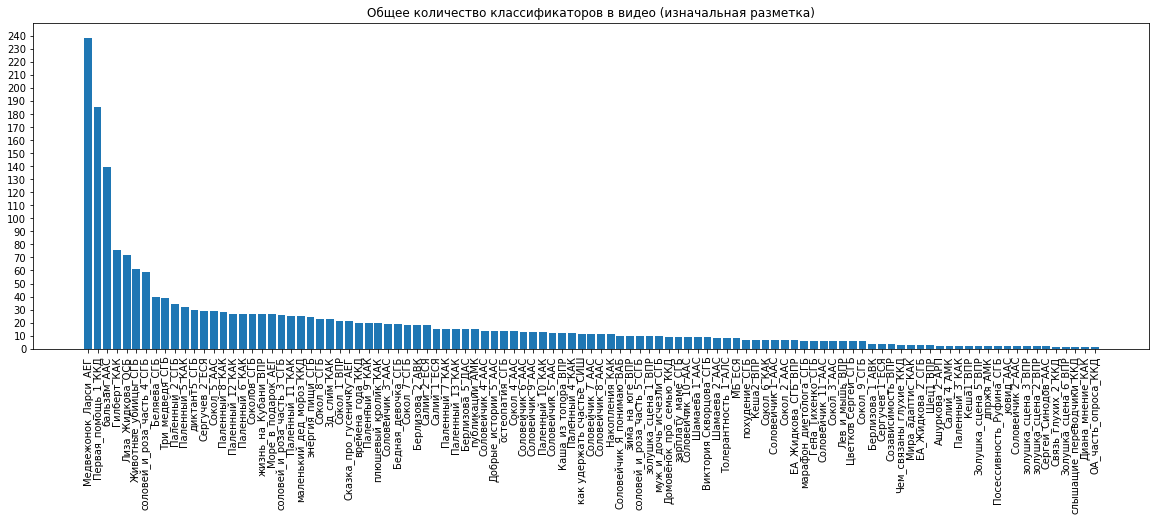

In [20]:
plt.figure(figsize=(20, 6))
plt.bar(df1.index, df1['classifier'])
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 250, 10))
plt.title('Общее количество классификаторов в видео (изначальная разметка)')
plt.savefig('./graphs/total_all.png', bbox_inches='tight')
plt.show()

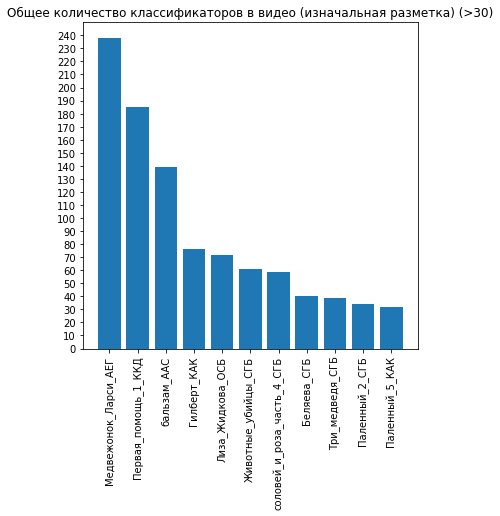

In [21]:
df_top_total = df1[df1['classifier'] > 30]
plt.figure(figsize=(6, 6))
plt.bar(df_top_total.index, df_top_total['classifier'])
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 250, 10))
plt.title('Общее количество классификаторов в видео (изначальная разметка) (>30)')
plt.savefig('./graphs/total_top.png', bbox_inches='tight')
plt.show()

In [22]:
df2 = df.drop_duplicates()
df2 = df2.groupby(['file_name']).count().sort_values(['classifier'], ascending=False)
df2 = df2.drop('timecodes', axis=1)
df2.index = df2.index.map(lambda x: x[:-4])

In [23]:
df2.head()

,classifier
file_name,
Медвежонок_Ларси_АЕГ,121
Первая_помощь_1_ККД,110
Гилберт_КАК,73
бальзам_ААС,72
Лиза_Жидкова_ОСБ,50


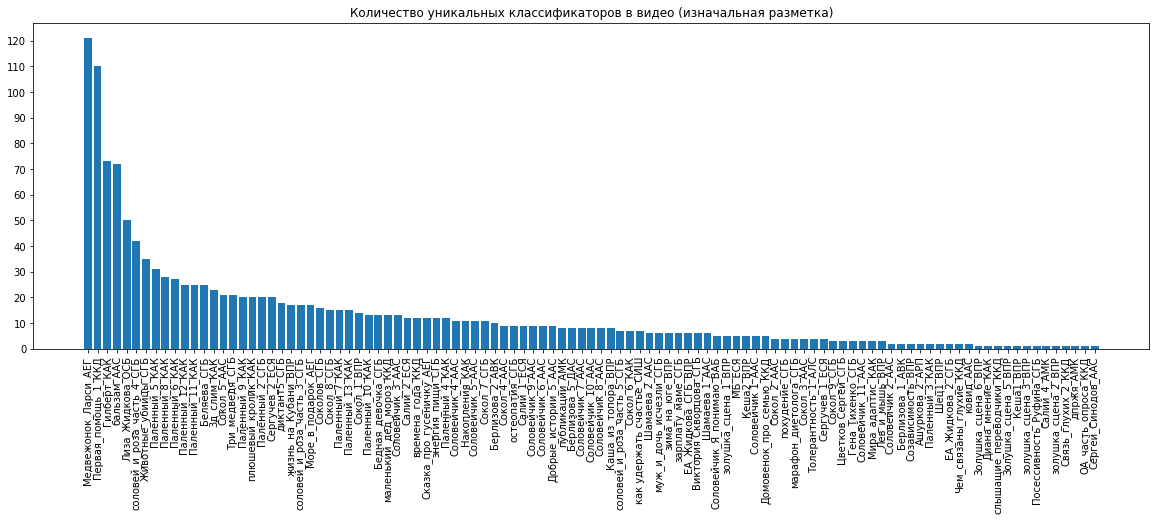

In [24]:
plt.figure(figsize=(20, 6))
plt.bar(df2.index, df2['classifier'])
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 130, 10))
plt.title('Количество уникальных классификаторов в видео (изначальная разметка)')
plt.savefig('./graphs/unique_all.png', bbox_inches='tight')
plt.show()

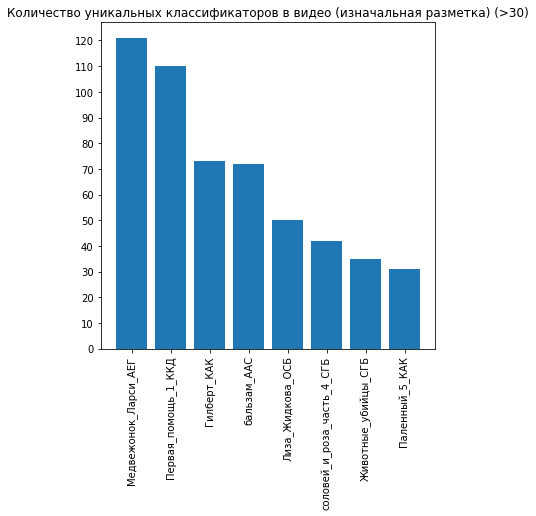

In [25]:
df_top_unique = df2[df2['classifier'] > 30]
plt.figure(figsize=(6, 6))
plt.bar(df_top_unique.index, df_top_unique['classifier'])
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 130, 10))
plt.title('Количество уникальных классификаторов в видео (изначальная разметка) (>30)')
plt.savefig('./graphs/unique_top.png', bbox_inches='tight')
plt.show()

In [35]:
len(set(df[(df.file_name == 'Медвежонок_Ларси_АЕГ.eaf') |
   (df.file_name == 'Первая_помощь_1_ККД.eaf') |
   (df.file_name == 'Гилберт_КАК.eaf') |
   (df.file_name == 'бальзам_ААС.eaf') |
   (df.file_name == 'Лиза_Жидкова_ОСБ.eaf')
  ].classifier))

242